# Smartphone can know what you are doing!
### author: Xiuyu Hong  

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import bqplot
import numpy as np
import ipywidgets
from sklearn.decomposition import PCA

### Introduction

Nowadays, we almost cannot live without our smartphone. There is too much information about us in the smartphone, our photos, contacts, location, and even passwords. This is because we choose to hand our privacy to the smartphone. But is that all what our smartphone know about us? Is there anything that smartphone can know without our input? With an experiment and some machine learning skill, we can answer the question. 
> Yes, our smartphone may know what we are doing!

### How the data is generated

This is an experiment conducted on 30 volunteers. Let's look into the experiment first. Please check the following video about the experiment.

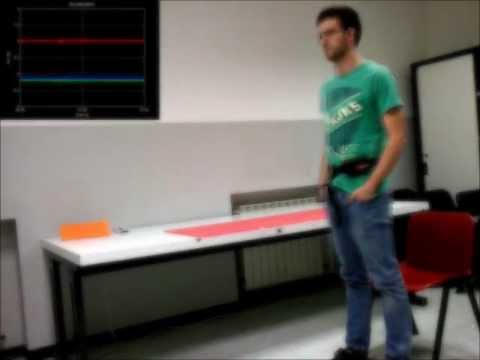

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('XOEN9W05_4A')

Contextual Visualization 1: [Activity Recognition Experiment Using Smartphone Sensors.](https://www.youtube.com/watch?v=XOEN9W05_4A&feature=youtu.be)

As we can see from the video, the volunteer is wearing a smartphone on the waist and doing some daily activities, which you and me may do everyday, including *walking, walking upstairs, walking downstairs, sitting, standing, laying*. And on the top left corner of the video, there are some signal curves that change as our volunteer moves. Maybe you are thinking, 
> I don't have such top-tech sensors in my smartphone. So, I'm safe.

Sorry, you are wrong. 

### Every smartphone has accelerometer

<img src="sensors.png" width="600">

Contextual Visualization 2: https://www.counterpointresearch.com/sensors-smartphones-top-10-billion-unit-shipments-2020/

As the above plot shows, in 2017, all the smartphones have accelerometer! And I believe it holds true now in 2020. 

In [3]:
# read in preprocessed data, saved to CSV last time
data = pd.read_csv('uci_har.csv')
data = data.astype({'label':'int'})
data = data[data.columns[1:]]

In [9]:
# read label names from file 
label_name = []
with open('UCI HAR Dataset/activity_labels.txt') as f:
    line = 'init'
    while line:
        line = f.readline().strip()
        if len(line) > 0:
            label_name.append(line.split()[1])

In [38]:
# remove the first column from users' option
feature_names = data.columns

Although the dataset has features extracted from two different smartphone-built-in sensors: accelerometer and gyroscope, to make it fair, let's just look at the features that are derived from the accelerometer. 

In [39]:
# use only features from accelerometer
feature_names = [x for x in feature_names if 'Acc' in x]

### Analysis with graph

Now, it's time to look at what the experiment and machine learning can tell our smartphone. Here, I also do some math to reduce the number of features so that we can look at the data more clearly.

In [40]:
# do a PCA on features to enable simple visualiztion
plot_x = data[feature_names]
pca = PCA(n_components=2)
plot_x = pca.fit_transform(plot_x)
plot_x = plot_x.T
plot_y = data.label.values

In [43]:
# calculate color for different labels
categories = np.unique(data['label'])
colors = np.linspace(0, 1, len(categories))
colordict = dict(zip(categories, colors))  

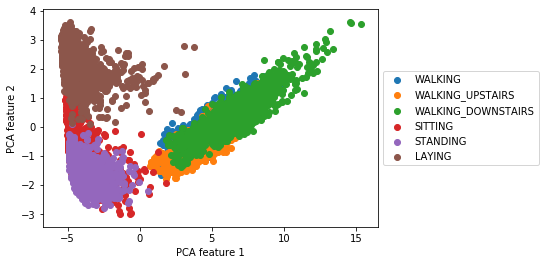

In [45]:
# plot for the central visualization
fig, ax = plt.subplots()  
for i, group in enumerate(categories):
    mask = (plot_y==group)
    plt.scatter(plot_x[0][mask], plot_x[1][mask])
plt.xlabel('PCA feature 1')
plt.ylabel('PCA feature 2')
plt.legend(label_name, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Conclusion

So, from the above graph, we can see that our smartphone can really tell at least whether we are walking or not! This is not really so surprise, right? This is how some of those fitness APP are working. But we are actually just using part of the information we have here. To be honest, half of the features, because the smartphone used in the experiment actually have two sensors. Another sensor is the one that 48% of the smartphones have in 2017, called Gyroscope. And it's 2020 now. Now you do the math. I say, it's pretty likely that the smartphone can at least tell apart all the activities included in the experiment. 

But don't panic. This can be **a good thing**. For example, when you sit for too long, some APP can tell you that you need to stand and move around. As long as we protect our data carefully, they can help us live a better life :)